In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load & Preprocess data**

In [4]:
df = pd.read_excel("/content/drive/MyDrive/for-clustering-users.xlsx", index_col=0)

In [5]:
df.head(5)

,name,screen_name,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,translated,topics,Preferred_archetype
0,Guadalupee,123ilSE,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,first time on twitter how doess this work lost,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,4M,4MCrypto,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,free aletop goon x buy approaching signal on h...,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,Arun Joseph,acid_milkshake,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 65 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 161 non-null    object 
 1   screen_name          161 non-null    object 
 2   favourites_count     161 non-null    int64  
 3   followers_count      161 non-null    int64  
 4   friends_count        161 non-null    int64  
 5   listed_count         161 non-null    int64  
 6   statuses_count       161 non-null    int64  
 7   Agreeableness        161 non-null    float64
 8   Openness             161 non-null    float64
 9   Neuroticism          161 non-null    float64
 10  Extraversion         161 non-null    float64
 11  Conscientiousness    161 non-null    float64
 12  Angry                161 non-null    float64
 13  Fear                 161 non-null    float64
 14  Joy                  161 non-null    float64
 15  Surprise             161 non-null    flo

In [7]:
df.drop(['name','screen_name', 'translated'], axis=1, inplace=True)
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 161 rows and 62 columns


,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question27,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,Latitude,Longitude,topics,Preferred_archetype
0,0,1,0,0,1,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,36423,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",52.3246,5.119300,"['low', 'origin', 'film', 'paddy', 'seinfuckin...",Leave legacy
1,2248,122,457,3,1246,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),34454,Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",52.0117,4.359700,"['water', 'sleep', 'solo', 'bah', 'steam', 'fi...",Provide structure
2,1834,43,276,0,327,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),36758,Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",13.2257,77.661150,"['police', 'nigeria', 'european', 'shoot', 'ou...",Provide structure
3,0,2,0,0,7,0.152750,0.250750,0.101250,0.146250,0.

In [8]:
df.describe()

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question27,Latitude,Longitude
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,7487.795031,1090.807453,397.664596,9.360248,8735.590062,0.136838,0.232683,0.128408,0.159262,0.163668,0.237874,0.085814,0.604020,0.005820,0.054046,0.012426,0.516160,33975.546584,49.525455,9.501200
std,26903.246597,5486.878044,1227.595826,58.513733,42355.757078,0.019243,0.023264,0.044704,0.025495,0.021846,0.222421,0.088205,0.328791,0.004140,0.042283,0.013438,0.514319,2925.192737,8.921840,15.126465
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.067125,0.187000,0.061333,0.105817,0.101648,0.000790,0.000303,0.073047,0.000479,0.000559,0.000858,-0.981900,21866.000000,1.441968,-80.819500
25%,77.000000,8.000000,40.000000,0.000000,55.000000,0.122250,0.213500,0.092500,0.139500,0.147000,0.027898,0.006475,0.296909,0.002312,0.017932,0.007041,0.551200,32857.000000,50.829400,5.422000
50%,632.000000,46.000000,138.000000,0.000000,496.000000,0.135000,0.233000,0.119500,0.155500,0.160417,0.187408,0.058284,0.610273,0.006170,0.056401,0.010637,0.647400,34688.000000,51.914600,6.877600
75%,3059.000000,211.000000,420.000000,3.000000,2565.000000,0.148158,0.250500,0.161308,0.173875,0.176500,0.445833,0.142085,0.930412,0.007964,0.076527,0.012723,0.843600,36218.000000,52.414000,9.747500
max,222224.000000,43744.000000,14976.000000,731.000000,503273.000000,0.194500,0.297250,0.244300,0.243500,0.230125,0.827150,0.309708,0.996395,0.028089,0.185226,0.154898,0.990100,37575.000000,63.246778,102.251800


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   favourites_count     161 non-null    int64  
 1   followers_count      161 non-null    int64  
 2   friends_count        161 non-null    int64  
 3   listed_count         161 non-null    int64  
 4   statuses_count       161 non-null    int64  
 5   Agreeableness        161 non-null    float64
 6   Openness             161 non-null    float64
 7   Neuroticism          161 non-null    float64
 8   Extraversion         161 non-null    float64
 9   Conscientiousness    161 non-null    float64
 10  Angry                161 non-null    float64
 11  Fear                 161 non-null    float64
 12  Joy                  161 non-null    float64
 13  Surprise             161 non-null    float64
 14  Sadness              161 non-null    float64
 15  Love                 161 non-null    flo

In [ ]:
#df_cat=df.select_dtypes('object')

In [ ]:
#df_cat.head(5)

,question1,question2,question3,question4,question5,question6,question7,question8,question9,question10,question11,question12,question13,question14,question15,question16,question17,question18,question19,question20,question21,question22,question23,question24,question25,question26,question28,question29,question30,question31,question32,question33,question34,question35,question36,question37,question38,question39,question40,question41,translated,Preferred_archetype
0,Right,Student Loan,"Not at all, i’d rather rent all assets.",Another benefit,Yearly a few times,Less then 1 hour,Every Day,3 hours or more,1 to 2 hours,1 to 2 hours,Every two weeks,Two to Three Times a Week,Every Year,Banking & Financial Services,I don't have a car,Netherlands,3 - 4 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, levi's, vans",I don't drive or have a car,"E, I can be found on social media platforms an...",Healthcare Insurance,Hockey,Hiking,Unemployed,Female,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,1399,Prolific Participant,"English, Dutch, German",Operations,"AirBnB, Walt Disney, Duracell, Virgin, Red Bul...",None,"Books, Clothing & Shoes, Health & Beauty","Instagram, Youtube, Whatsapp","Print (Newspapers & Periodicals), Radio (AM/FM...",first time on twitter how doess this work lost,Leave legacy
1,Right,Student Loan,"Yes, but in some cases I would consider rental...",A paid job,Every day,1 to 2 hours,Once a Week,3 hours or more,3 hours or more,Less then 1 hour,Monthly,Once a Week,Every Few Years,"Retail, Wholesale & Distribution",I don't have a car,Netherlands,2 persons,"Maybe, it depends if nothing betters comes up",Desktop,"adidas, two thirds, salomon",I don't drive or have a car,"C, I respond to the content available online,...","Healthcare Insurance, Home Owners Insurance, R...",Swimming,Swimming,Employed part time (1-34 hours per week),Male,Bachelor's degree,Less then 20.000 EUR,Single,Netherlands,2611AN,Prolific Participant,"English, Dutch","Marketing, Sales & Business Development","Unicef, Lego, Volvo, IBM, Apple, Porsche","Savings Account, Stock Options","Electronics & Computers, Handmade Products, Sp...","Facebook, Instagram, Twitter","Online News (News Websites, News Apps), Print ...",free aletop goon x buy approaching signal on h...,Provide structure
2,Right,Student Loan,Yes a lot. It’s very important to me. I try to...,A paid job,Every day,1 to 2 hours,Two to Three Times a Week,3 hours or more,3 hours or more,1 to 2 hours,Three days a week,Two to Three Times a Week,Every Year,Software & IT Services,I don't have a car,India,3 - 4 persons,"No, not necessarily, i don't feel that committ...",Smartphone or Tablet,"Tesla, Google, Asus",I don't drive or have a car,"D, I am eager for information and absorb artic...",Life Insurance,Soccer,Cooking,Independent part time (1-34 hours per week),Male,Some college (no degree) Associate's degree,Less then 20.000 EUR,Single,India,560066,Odema Community Member,"English, German",Information Technology,"Unicef, Lego, Volvo, IBM, Apple, Porsche",Mutual Funds,"Books, Clothing & Shoes, Electronics & Compute...","Instagram, Twitter, Linkedin, Youtube, Whatsapp","Online News (News Websites, News Apps), Podcas...",i hate the fact that intro track is more than ...,Provide structure
3,Right,Auto Loans,"Not at all, i’d rather rent all assets.",A paid job,1 day a week,1 to 2 hours,Not at All,3 hours or more,1 to 2 hours,2 to 3 hours,Monthly,Not at All,Every Quarter,Healthcare,Owned,Germany,2 persons,"No, not necessarily, i don't feel that committ...",Laptop,"Adidas, Tom Tailor, Milka",C-segment / Compact,"C, I respond to the content available online,...","Auto Insurance, Healthcare Insurance",Hiking,Hiking,Employed full time (35+ hours per week),Male,Some college (no degree) Associate's degree,20.000 EUR to 50.000 EUR,Living together,Germany,56333,Prolific Participant,German,Information Technology,"Walmart, Victoria Secret, Pepsi, McDonalds, Ha...","Savings Account, Stock Options"

**Implementing One-Hot-Encoder**

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [ ]:
# to_encode = ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7', 'question8', 'question9', 'question10', 
#              'question11', 'question12', 'question13', 'question14','question15', 'question16','question17', 'question18', 'question19', 
#              'question20', 'question21', 'question22', 'question23', 'question24', 'question25', 'question26', 'question27', 'question28',
#              'question29', 'question30', 'question31', 'question32', 'question33', 'question34', 'question35','question36', 'question37', 
#              'question38', 'question39', 'question40', 'question41', 'translated', 'Preferred_archetype']

# mct_model = make_column_transformer((OneHotEncoder(sparse=False), to_encode), remainder = 'passthrough')
# mct_model.fit_transform(df)

In [ ]:
mct_model0 = make_column_transformer((OneHotEncoder(sparse= False), ['question1', 'question2', 'question3', 'question4', 'question5', 'question6', 'question7',
                                                        'question8', 'question9', 'question10', 'question11', 'question12', 'question13', 
                                                        'question14', 'question15', 'question16', 'question17', 'question18', 'question19',
                                                        'question21', 'question22', 'question23', 'question24', 'question25', 'question26', 
                                                        'question27','question28', 'question29', 'question30', 'question31', 'question32',
                                                        'question34', 'question35', 'question36', 'question37', 'question38', 'question39',
                                                        'question40', 'question41', 'topics', 'Preferred_archetype'
                                                         ]), 
                                     remainder = 'passthrough')

OHE=mct_model0.fit_transform(df)
OHE

array([[0.0, 1.0, 0.0, ..., 1399, 52.3246, 5.1193],
       [0.0, 1.0, 0.0, ..., '2611AN', 52.0117, 4.3597],
       [0.0, 1.0, 0.0, ..., 560066, 13.2257, 77.66115],
       ...,
       [0.0, 1.0, 0.0, ..., '4702ZH', 51.5371, 4.4729],
       [0.0, 1.0, 0.0, ..., '2312 TM', 52.5001698, 5.7480821],
       [0.0, 1.0, 0.0, ..., '3972bc', 52.0499, 5.275]], dtype=object)

In [ ]:
# mct_model1 = make_column_transformer((OneHotEncoder(sparse=False), ['question33']), remainder = 'passthrough')
# mct_model.fit_transform(df)

In [11]:
# Onehot encoder with Pandas
new = pd.get_dummies(df)
new

,favourites_count,followers_count,friends_count,listed_count,statuses_count,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment,question27,Latitude,Longitude,question1_Left,question1_Right,question2_Auto Loans,"question2_Auto Loans, Credit Cards, Home Mortgage","question2_Auto Loans, Credit Cards, Home Mortgage, Student Loan","question2_Auto Loans, Credit Cards, Personal Loan",question2_Business Loan,"question2_Business Loan, Home Mortgage",question2_Credit Cards,"question2_Credit Cards, Home Mortgage","question2_Credit Cards, Home Mortgage, Student Loan","question2_Credit Cards, Personal Loan","question2_Credit Cards, Personal Loan, Student Loan","question2_Credit Cards, Student Loan",question2_Home Mortgage,"question2_Home Mortgage, Personal Loan","question2_Home Mortgage, Student Loan",question2_None,question2_Personal Loan,"question2_Personal Loan, Student Loan",...,"question41_Radio (AM/FM, Internet, Satellite), TV (Late Night Comedy, Other), TV (Local/Cable News Broadcast)","question41_Radio (AM/FM, Internet, Satellite), TV (Late Night Comedy, Other), Word of Mouth","question41_Radio (AM/FM, Internet, Satellite), TV (Local/Cable News Broadcast)",question41_Social Media,"question41_Social Media, TV (Late Night Comedy, Other)","question41_Social Media, TV (Local/Cable News Broadcast), Word of Mouth","question41_Social Media, Word of Mouth",question41_TV (Local/Cable News Broadcast),question41_Word of Mouth,"topics_['chillslow', 'oh', 'ad', 'tiktoks', 'offense', 'doing', 'poorly', 'aleykum', 'steps', 'subscribers', 'athleisure', 'animal', 'valencian', 'doesnt', 'sedition']","topics_['couldnt', 'young', 'science', 'pressure', 'track', 'panicked', 'arresting', 'mohammed', 'sweet', 'brutal', 'station', 'wrap', 'officials', 'fake', 'cavaleiros']","topics_['did', 'advice', 'years', 'anything', 'was', 'man', 'them', 'until', 'fall', 'often', 'idea', 'year', 'played', 'switch', 'cheese']","topics_['escape', 'comments', 'damage', 'shit', 'wed', 'multiple', 'give', 'weekend', 'visit', 'halflife', 'next', 'adhd', 'stop', 'famous', 'staing']","topics_['fact', 'whoever', 'two', 'others', 'studies', 'basic', 'group', 'racism', 'problems', 'vaccination', 'same', 'write', 'cis', 'uk', 'unfortunately']","topics_['here', 'hit', 'blockchain', 'even', 'token', 'future', 'join', 'project', 'serious', 'check', 'dbft', 'ready', 'founder', 'meet', 'our']","topics_['hold', 'racist', 'nazis', 'upgrade', 'songs', 'school', 'shouldnt', 'interview', 'incredible', 'extremist', 'filter', 'video', 'enough', 'star', 'anything']","topics_['hoursto', 'enjoying', 'fast', 'waiting', 'juld', 'pack', 'cosmic', 'ryzen', 'part', 'away', 'next', 'stoch', 'myselfends', 'winning', 'luck']","topics_['illegal', 'cat', 'workout', 'england', 'holiday', 'training', 'hangover', 'canceled', 'lot', 'instagram', 'edition', 'siren', 'overwatch', 'man', 'fear']","topics_['it', 'keep', 'write', 'please', 'take', 'like', 'pandemic', 'racist', 'how', 'shit', 'fine', 'here', 'wait', 'what', 'feel']","topics_['ive', 'wearing', 'making', 'pants', 'sad', 'approa', 'pro', 'publisher', 'stay', 'chair', 'package', 'red', 'citizens', 'folks', 'lucky']","topics_['low', 'origin', 'film', 'paddy', 'seinfuckingfeld', 'flakes', 'ranking', 'correctly', 'vent', 'loveydovey', 'word', 'hmmmm', 'possessions', 'motherboards', 'gumi']","topics_['morning', 'shot', 'research', 'guy', 'every', 'against', 'waiting', 'prison', 'statement', 'internet', 'rotterdam', 'everyonefor', 'radio', 'immigration', 'decisions']","topics_['particularly', 'enunciation', 'background', 'carmen', 'beach', 'vaccinations', 'actively', 'aikel', 'pull', 'parts', 'povey', 'summer', 'hairdresser', 'android', 'road']","topics_['perplexed', 'neusta', 'luffy', 'hmmmm', 'promptly', 'formed', 'knitted', 'akash', 'kyi', 'renowned', 'preppi', 'windbag', 'decoupling', 'powerf', 'chillslow']","topics_['play', 'has', 'phone', 'me', 'doctors', 'now', 'made', 'movie', 'united', '

In [ ]:
# df_num = df.loc[:,df.dtypes!=np.object]
# df_num.head(5)

In [ ]:
# df_final = df_num.merge(df_cat, left_index=True, right_index=True)
# df_final.head(5)

**Normalizing Dataset**

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
norm_df = scaler.fit_transform(new)
norm_df

array([[0.00000000e+00, 2.28602780e-05, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.01159191e-02, 2.78895391e-03, 3.05154915e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.25293398e-03, 9.82991953e-04, 1.84294872e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [6.52044784e-03, 7.08668617e-03, 1.49572650e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [7.64093887e-03, 4.52633504e-03, 8.01282051e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.88998488e-02, 8.34720190e-01, 3.16506410e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

**Playing with DBSCAN Clustering**

In [ ]:
from sklearn.cluster import DBSCAN

# We have 2 results of One Hot Encoder:
# the first is new from Pandas
# second is OHM from Sklearn

In [ ]:
#df_personal_emotion = df_num.select_dtypes('float64')

In [ ]:
#df_personal_emotion

,Agreeableness,Openness,Neuroticism,Extraversion,Conscientiousness,Angry,Fear,Joy,Surprise,Sadness,Love,sentiment
0,0.147083,0.211042,0.168833,0.150292,0.187042,0.044171,0.020499,0.875858,0.003289,0.047788,0.008394,0.6721
1,0.129500,0.221500,0.143000,0.189500,0.182500,0.035848,0.001670,0.780312,0.001635,0.025637,0.154898,0.9586
2,0.113000,0.211500,0.068000,0.126500,0.142000,0.457770,0.130685,0.336976,0.007447,0.054606,0.012515,0.7403
3,0.152750,0.250750,0.101250,0.146250,0.166500,0.187408,0.067470,0.671730,0.007165,0.053518,0.012708,0.6229
4,0.117500,0.198500,0.089500,0.139500,0.141500,0.484141,0.130836,0.299476,0.006947,0.066798,0.011803,0.9839
...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.176900,0.198050,0.121300,0.206550,0.215850,0.167588,0.033153,0.731576,0.010141,0.039440,0.018103,0.0000
165,0.148195,0.222919,0.174052,0.131733,0.101648,0.009593,0.003714,0.970785,0.001892,0.009047,0.004969,0.0000
166,0.166102,0.218158,0.150352,0.164523,0.215715,0.015467,0.005731,0.959435,0.002722,0.010891,0.005754,0.0000
167,0.131592,0.225433,0.161308,0.184767,0.178492,0.039814,0.010619,0.915958,0.003785,0.018278,0.011545,0.0000


In [ ]:
# This clustering use all columns, except 'name', 'screen_name', and 'translated' This is with normalization
clustering1 = DBSCAN(eps=10, min_samples=100).fit(norm_df)
cluster1 = clustering1.labels_
cluster1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [ ]:
# This clustering use all columns, except 'name', 'screen_name', and 'translated' This is without normalization
clustering2 = DBSCAN(eps=500, min_samples=2).fit(new)
cluster2 = clustering2.labels_
cluster2

array([ 0, -1,  1, -1, -1,  0, -1,  0, -1,  2, -1,  2, -1,  0,  3,  4,  0,
       -1,  0, -1,  0,  0,  5, -1,  6,  0,  0, -1,  0,  2,  0,  7,  0,  0,
       -1,  0, -1, -1,  0, -1, -1, -1,  5, -1, -1, -1, -1,  0,  0,  8, -1,
        2, -1, -1, -1, -1, -1, -1,  9,  0, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1,  6,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1,  0, -1, 10,  2, -1, -1,  0, -1, 10,  5, -1, -1,  0, -1, -1, -1,
       -1,  2,  0,  2,  0,  0, -1, -1, -1, -1,  0, -1,  0, -1,  0,  6,  0,
       -1, -1,  9,  4,  1, -1, -1, -1, -1, -1,  0, -1,  2, -1,  8,  0,  0,
       -1,  7, -1, -1, -1,  5, -1, -1,  6,  2,  0,  0,  0, -1,  0, -1, -1,
       -1, -1, -1, -1, 10,  5,  3, -1])

In [ ]:
len(set(cluster1))

1

In [ ]:
len(set(cluster2))

12

PLaying with Fuzzy clustering

In [ ]:
!pip install fuzzy-c-means

In [ ]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

In [ ]:
n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

**Playing with Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# for hierarchical clustering the normalized dataset 
clustering = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8).fit(norm_df)

In [ ]:
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=8)

In [ ]:
clustering.labels_

array([5, 0, 3, 4, 1, 5, 2, 5, 3, 2, 5, 5, 1, 4, 7, 2, 3, 5, 1, 4, 6, 0,
       1, 5, 5, 0, 3, 2, 6, 4, 0, 2, 4, 0, 4, 0, 0, 4, 6, 6, 2, 7, 7, 5,
       4, 5, 4, 1, 2, 6, 1, 4, 4, 7, 7, 0, 2, 0, 2, 1, 1, 0, 7, 7, 1, 2,
       3, 4, 0, 2, 1, 0, 1, 4, 1, 4, 1, 6, 0, 3, 5, 0, 1, 2, 2, 0, 5, 1,
       4, 4, 2, 1, 1, 0, 4, 1, 7, 0, 5, 2, 2, 2, 1, 6, 1, 4, 5, 1, 6, 5,
       5, 0, 0, 1, 5, 6, 6, 0, 1, 0, 2, 4, 7, 4, 4, 4, 0, 6, 5, 1, 7, 4,
       0, 1, 0, 1, 4, 4, 4, 0, 3, 0, 1, 4, 0, 4, 5, 6, 5, 1, 0, 0, 7, 5,
       0, 3, 4, 4, 0, 4, 2])

**K-Mean & elbow method**

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Automatically Finding Optimal number of K**

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[4921.876044292616, 4703.4470815638315, 4566.352451036347, 4465.675589865145, 4421.768882816902, 4380.273241854944, 4321.450381253472, 4281.221716819982, 4245.476978744365]


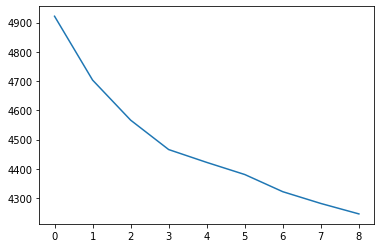

In [72]:
cost = []
K = list(range(1,10))
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(norm_df) #use 'new' for dataset without normalisazion, use norm_df for dataset after normalization
    cost.append(kmeans.inertia_)

plt.plot(cost)
print(K)
print(cost)

In [73]:
import math
def calc_distance (x1,y1, a,b,c):
  d = abs(a*x1+b*y1+c)/(math.sqrt(a*a+b*b))
  return d

In [74]:
a = cost[0]-cost[-1]
b = K[-1] - K[0]
c1 = K[0] * cost[-1]
c2 = K[-1] * cost[0]
c = c1-c2

In [75]:
distance_of_points_from_line = []
for k in range(len(K)):
  distance_each_point = calc_distance(K[k], cost[k],a,b,c)
  distance_of_points_from_line.append(distance_each_point)

[0.0, 1.5833223129665195, 2.2047433084785943, 2.395469179625935, 1.9148022383528631, 1.4056207991783802, 1.1013599015265059, 0.5771945513892928, 0.0]


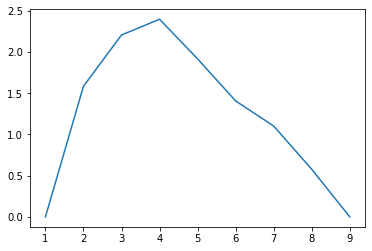

In [76]:
plt.plot(K, distance_of_points_from_line)
print(distance_of_points_from_line)

In [77]:
opt_Cost = max(distance_of_points_from_line)
opt_Cost

2.395469179625935

In [78]:
opt_Ind = distance_of_points_from_line.index(opt_Cost)
opt_Ind

3

In [79]:
kmeans = KMeans(n_clusters=K[opt_Ind]).fit(norm_df) #use 'new' for dataset without normalisazion, use norm_df for dataset after normalization
kmeans.labels_

array([3, 3, 3, 2, 1, 3, 0, 3, 2, 2, 3, 3, 1, 0, 2, 2, 3, 3, 1, 0, 1, 1,
       1, 3, 3, 3, 3, 2, 0, 0, 2, 2, 0, 3, 0, 3, 1, 2, 1, 1, 2, 2, 2, 3,
       0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 3, 1, 1, 2, 2, 1, 2,
       1, 0, 3, 3, 1, 1, 1, 1, 3, 0, 1, 1, 1, 3, 3, 3, 1, 2, 2, 3, 3, 1,
       2, 0, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 2, 2, 1, 0, 1, 0, 3, 1, 1, 3,
       3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 2, 2, 2, 1, 0, 2, 1, 0, 3, 1, 2, 0,
       3, 1, 3, 1, 0, 2, 0, 3, 2, 3, 1, 2, 2, 0, 2, 1, 3, 1, 3, 3, 0, 3,
       3, 1, 2, 1, 3, 3, 2], dtype=int32)